# Two Dimensional Histogram Filter - Your First Feature (and your first bug).
Writing code is important. But a big part of being on a self driving car team is working with a **large** existing codebase. On high stakes engineering projects like a self driving car, you will probably have to earn the trust of your managers and coworkers before they'll let you make substantial changes to the code base. 

A typical assignment for someone new to a team is to make progress on a backlog of bugs. So with that in mind, that's what you will be doing for your first project in the Nanodegree.

You'll go through this project in a few parts:

1. **Explore the Code** - don't worry about bugs at this point. The goal is to get a feel for how this code base is organized and what everything does.
2. **Implement a Feature** - write code that gets the robot moving correctly.
3. **Fix a Bug** - Implementing motion will reveal a bug which hadn't shown up before. Here you'll identify what the bug is and take steps to reproduce it. Then you'll identify the cause and fix it.


## Part 1: Exploring the code
In this section you will just run some existing code to get a feel for what this localizer does.

You can navigate through this notebook using the arrow keys on your keyboard. You can run the code in a cell by pressing **`Ctrl + Enter`**

Navigate through the cells below. In each cell you should

1. Read through the code. It's okay to not understand everything at this point. 
2. Make a guess about what will happen when you run the code. 
3. Run the code and compare what you see with what you expected. 
4. When you get to a **TODO** read the instructions carefully and complete the activity.

## 1부: 코드 탐색
이 섹션에서는 기존 코드를 실행하여 이 로컬라이저가 하는 일을 느껴보겠습니다.

키보드의 화살표 키를 사용하여 이 노트북을 탐색할 수 있습니다. **`Ctrl + Enter`**를 눌러 셀에서 코드를 실행할 수 있습니다.

아래 셀을 탐색합니다. 각 셀에서

1. 코드를 읽어보세요. 이 시점에서 모든 것을 이해하지 못해도 괜찮습니다.
2. 코드를 실행하면 무슨 일이 일어날지 추측해 보세요.
3. 코드를 실행하고 예상한 것과 보이는 것을 비교하세요.
4. **TODO**에 도달하면 지침을 주의 깊게 읽고 활동을 완료하세요.

In [168]:
# This code "imports" code from some of the other files we've written
# in this directory. Specifically simulate.py and helpers.py
import simulate as sim
import helpers
import localizer

# Don't worry too much about this code for now...
from __future__ import division, print_function
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of localizer failed: Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\extensions\autoreload.py", line 280, in check
    elif self.deduper_reloader.maybe_reload_module(m):
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\extensions\deduperreload\deduperreload.py", line 533, in maybe_reload_module
    new_source_code = f.read()
                      ^^^^^^^^
UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 778: illegal multibyte sequence
]


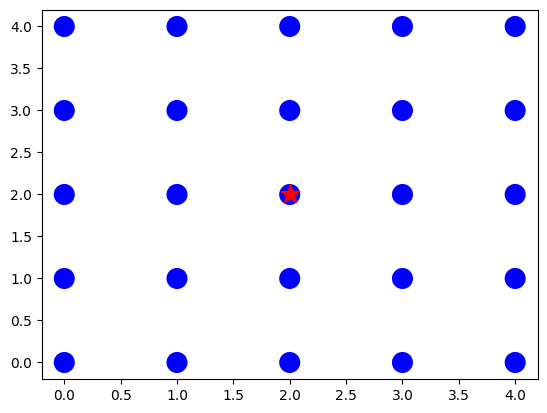

In [169]:
# This code defines a 5x5 robot world as well as some other parameters
# which we will discuss later. It then creates a simulation and shows 
# the initial beliefs. 
R = 'r'
G = 'g'
grid = [
    [R,G,G,G,R],
    [G,G,R,G,R],
    [G,R,G,G,G],
    [R,R,G,R,G],
    [R,G,R,G,R],
]
blur = 0.05
p_hit = 200.0
simulation = sim.Simulation(grid, blur, p_hit)
simulation.show_beliefs()

Run the code below multiple times by repeatedly pressing Ctrl + Enter.

After each run observe how the state has changed. 

type(beliefs): <class 'list'>
type(beliefs[0]): <class 'list'>


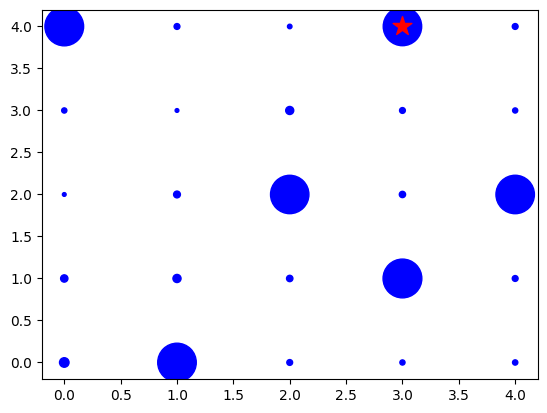

In [171]:
simulation.run(1)
simulation.show_beliefs()

What do you think this call to `run` is doing? Look at the code in **`simulate.py`** to find out (remember - you can see other files in the current directory by clicking on the `jupyter` logo in the top left of this notebook).

Spend a few minutes looking at the `run` method and the methods it calls to get a sense for what's going on.

`run`에 대한 이 호출이 무엇을 한다고 생각하십니까? **`simulate.py`**의 코드를 살펴보세요(기억하세요 - 이 노트북의 왼쪽 상단에 있는 `jupyter` 로고를 클릭하면 현재 디렉토리의 다른 파일을 볼 수 있습니다).

`run` 메서드와 호출하는 메서드를 몇 분 동안 살펴보면 무슨 일이 일어나고 있는지 알 수 있습니다.

#### What am I looking at?

The red star shows the robot's true position. The blue circles indicate the strength of the robot's belief that it is at any particular location.

Ideally we want the biggest blue circle to be at the same position as the red star.

#### 내가 무엇을 보고 있는가?

빨간 별은 로봇의 실제 위치를 보여줍니다. 파란 원은 로봇이 특정 위치에 있다는 믿음의 강도를 나타냅니다.

이상적으로는 가장 큰 파란 원이 빨간 별과 같은 위치에 있기를 원합니다.

In [172]:
# We will provide you with the function below to help you look
# at the raw numbers.

def show_rounded_beliefs(beliefs):
    for row in beliefs:
        for belief in row:
            print("{:0.3f}".format(belief), end="  ")
        print()
        
# The {:0.3f} notation is an example of "string 
# formatting" in Python. You can learn more about string 
# formatting at https://pyformat.info/

In [173]:
show_rounded_beliefs(simulation.beliefs)

0.155  0.004  0.002  0.153  0.004  
0.003  0.001  0.007  0.003  0.003  
0.001  0.005  0.153  0.004  0.153  
0.006  0.007  0.004  0.156  0.004  
0.009  0.154  0.003  0.003  0.003  


_____

## Part 2: Implement a 2D sense function.

As you can see, the robot's beliefs aren't changing. No matter how many times we call the simulation's sense method, nothing happens. The beliefs remain uniform.

## 2부: 2D 감지 함수 구현.

보시다시피, 로봇의 믿음은 변하지 않습니다. 시뮬레이션의 감지 방법을 아무리 호출해도 아무 일도 일어나지 않습니다. 믿음은 균일하게 유지됩니다.

### Instructions

1. Open `localizer.py` and complete the `sense` function.
3. Run the code in the cell below to import the localizer module (or reload it) and then test your sense function.
4. If the test passes, you've successfully implemented your first feature! Keep going with the project. If your tests don't pass (they likely won't the first few times you test), keep making modifications to the `sense` function until they do!

### 지침

1. `localizer.py`를 열고 `sense` 함수를 완성합니다.
3. 아래 셀의 코드를 실행하여 localizer 모듈을 임포트(또는 다시 로드)한 다음 sense 함수를 테스트합니다.
4. 테스트에 통과하면 첫 번째 기능을 성공적으로 구현한 것입니다! 프로젝트를 계속 진행합니다. 테스트에 통과하지 못하면(처음 몇 번 테스트할 때는 통과하지 못할 가능성이 높음) 통과할 때까지 `sense` 함수를 계속 수정합니다!

In [174]:
#reload(localizer)
def test_sense():
    R = 'r'
    _ = 'g'

    simple_grid = [
        [_,_,_],
        [_,R,_],
        [_,_,_]
    ]

    p = 1.0 / 9
    initial_beliefs = [
        [p,p,p],
        [p,p,p],
        [p,p,p]
    ]

    observation = R

    expected_beliefs_after = [
        [1/11, 1/11, 1/11],
        [1/11, 3/11, 1/11],
        [1/11, 1/11, 1/11]
    ]

    p_hit  = 3.0
    p_miss = 1.0
    beliefs_after_sensing = localizer.sense(
        observation, simple_grid, initial_beliefs, p_hit, p_miss)

    if helpers.close_enough(beliefs_after_sensing, expected_beliefs_after):
        print("Tests pass! Your sense function is working as expected")
        return
    
    elif not isinstance(beliefs_after_sensing, list):
        print("Your sense function doesn't return a list!")
        return
        
    elif len(beliefs_after_sensing) != len(expected_beliefs_after):
        print("Dimensionality error! Incorrect height")
        return
              
    elif len(beliefs_after_sensing[0] ) != len(expected_beliefs_after[0]):
        print("Dimensionality Error! Incorrect width")
        return
    
    elif beliefs_after_sensing == initial_beliefs:
        print("Your code returns the initial beliefs.")
        return
        
    total_probability = 0.0
    for row in beliefs_after_sensing:
        for p in row:
            total_probability += p
    if abs(total_probability-1.0) > 0.001:
        
        print("Your beliefs appear to not be normalized")
        return
    
    print("Something isn't quite right with your sense function")

test_sense()

Tests pass! Your sense function is working as expected


## Integration Testing

Before we call this "complete" we should perform an **integration test**. We've verified that the sense function works on it's own, but does the localizer work overall?

Let's perform an integration test. First you you should execute the code in the cell below to prepare the simulation environment.

## 통합 테스트

이것을 "완료"라고 부르기 전에 **통합 테스트**를 수행해야 합니다. 감지 기능이 자체적으로 작동하는지 확인했지만 로컬라이저는 전반적으로 작동합니까?

통합 테스트를 수행해 보겠습니다. 먼저 아래 셀의 코드를 실행하여 시뮬레이션 환경을 준비해야 합니다.

In [175]:
from simulate import Simulation
import simulate as sim
import helpers

#reload(localizer)
#reload(sim)
#reload(helpers)

R = 'r'
G = 'g'
grid = [
    [R,G,G,G,R,R,R],
    [G,G,R,G,R,G,R],
    [G,R,G,G,G,G,R],
    [R,R,G,R,G,G,G],
    [R,G,R,G,R,R,R],
    [G,R,R,R,G,R,G],
    [R,R,R,G,R,G,G],
]

# Use small value for blur. This parameter is used to represent
# the uncertainty in MOTION, not in sensing. We want this test
# to focus on sensing functionality

# 흐림에 작은 값을 사용합니다. 이 매개변수는 감지가 아닌
# 모션의 불확실성을 나타내는 데 사용됩니다. 우리는 이 테스트가
# 감지 기능에 초점을 맞추기를 원합니다.
blur = 0.1
p_hit = 100.0
simulation = sim.Simulation(grid, blur, p_hit)

type(beliefs): <class 'list'>
type(beliefs[0]): <class 'list'>


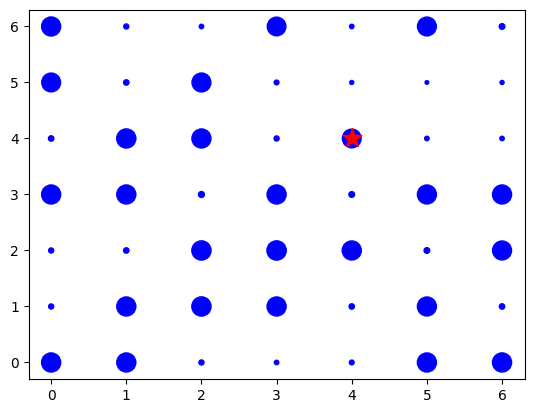

In [176]:
# Use control+Enter to run this cell many times and observe how 
# the robot's belief that it is in each cell (represented by the
# size of the corresponding circle) changes as the robot moves.
# The true position of the robot is given by the red star.

# Run this cell about 15-25 times and observe the results

# control+Enter를 사용하여 이 셀을 여러 번 실행하고
# 로봇이 각 셀에 있다는 믿음(해당 원의 크기로 표시)이 로봇이 움직일 때 어떻게 바뀌는지 관찰합니다.
# 로봇의 실제 위치는 빨간색 별로 표시됩니다.

# 이 셀을 약 15-25회 실행하고 결과를 관찰합니다.

simulation.run(1)
simulation.show_beliefs()

# If everything is working correctly you should see the beliefs
# converge to a single large circle at the same position as the 
# red star. Though, if your sense function is implemented correctly
# and this output is not converging as expected.. it may have to do
# with the `move` function bug; your next task!
#
# When you are satisfied that everything is working, continue
# to the next section

# 모든 것이 제대로 작동하면 신념이
# 빨간 별과 같은 위치에 있는 하나의 큰 원으로 수렴하는 것을 볼 수 있습니다. 하지만 감지 기능이 올바르게 구현되었고
# 이 출력이 예상대로 수렴하지 않는 경우.. `move` 함수 버그와 관련이 있을 수 있습니다. 다음 작업입니다!
#
# 모든 것이 제대로 작동한다고 만족하면
# 다음 섹션으로 계속 진행하세요.

## Part 3: Identify and Reproduce a Bug

Software has bugs. That's okay.

A user of your robot called tech support with a complaint

> "So I was using your robot in a square room and everything was fine. Then I tried loading in a map for a rectangular room and it drove around for a couple seconds and then suddenly stopped working. Fix it!"

Now we have to debug. We are going to use a systematic approach.

1. Reproduce the bug
2. Read (and understand) the error message (when one exists)
3. Write a test that triggers the bug.
4. Generate a hypothesis for the cause of the bug.
5. Try a solution. If it fixes the bug, great! If not, go back to step 4.

## 3부: 버그 식별 및 재현

소프트웨어에는 버그가 있습니다. 괜찮습니다.

로봇 사용자가 기술 지원에 전화하여 불만을 제기했습니다.

> "그래서 저는 정사각형 방에서 로봇을 사용했는데 모든 것이 괜찮았습니다. 그런 다음 직사각형 방의 지도를 로드하려고 했는데 몇 초 동안 돌아다닌 다음 갑자기 작동이 멈췄습니다. 고쳐주세요!"

이제 디버깅을 해야 합니다. 체계적인 접근 방식을 사용할 것입니다.

1. 버그 재현
2. 오류 메시지(있는 경우)를 읽고 이해
3. 버그를 트리거하는 테스트를 작성합니다.
4. 버그 원인에 대한 가설을 생성합니다.
5. 솔루션을 시도합니다. 버그가 해결되면 좋습니다! 그렇지 않으면 4단계로 돌아갑니다.

### Step 1: Reproduce the bug

The user said that **rectangular environments** seem to be causing the bug. 

The code below is the same as the code you were working with when you were doing integration testing of your new feature. See if you can modify it to reproduce the bug.

### 1단계: 버그 재현

사용자는 **직사각형 환경**이 버그를 일으키는 것 같다고 말했습니다.

아래 코드는 새 기능의 통합 테스트를 수행할 때 작업했던 코드와 동일합니다. 버그를 재현하도록 수정할 수 있는지 확인하세요.

In [251]:
from simulate import Simulation
import simulate as sim
import helpers
import localizer

#reload(localizer)
#reload(sim)
#reload(helpers)

R = 'r'
G = 'g'

grid = [ 
    [R,G,G,G,R,R,R],
    [G,G,R,G,R,G,R],
    [G,R,G,G,G,G,R],
    [R,R,G,R,G,G,G],
]

blur = 0.001
p_hit = 100.0
simulation = sim.Simulation(grid, blur, p_hit)

# remember, the user said that the robot would sometimes drive around for a bit...
# It may take several calls to "simulation.run" to actually trigger the bug.


type(beliefs): <class 'list'>
type(beliefs[0]): <class 'list'>


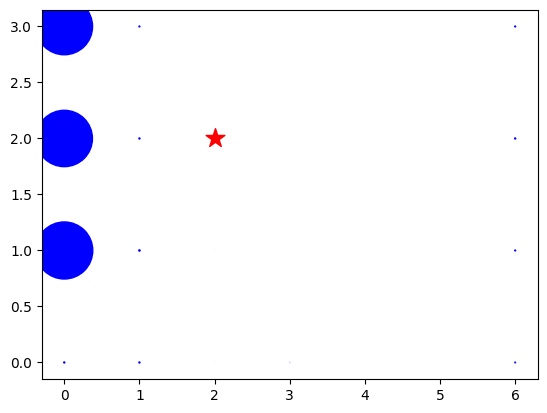

In [257]:
simulation.run(1)
simulation.show_beliefs()

### Step 2: Read and Understand the error message

If you triggered the bug, you should see an error message directly above this cell. The end of that message should say:

```
IndexError: list index out of range
```

And just above that you should see something like

```
path/to/your/directory/localizer.pyc in move(dy, dx, beliefs, blurring)
     38             new_i = (i + dy ) % width
     39             new_j = (j + dx ) % height
---> 40             new_G[int(new_i)][int(new_j)] = cell
     41     return blur(new_G, blurring)
```

This tells us that line 40 (in the move function) is causing an `IndexError` because "list index out of range".

If you aren't sure what this means, use Google! 

Copy and paste `IndexError: list index out of range` into Google! When I do that, I see something like this:

![Search Results](http://i.imgur.com/gleBmBy.png)

Browse through the top links (often these will come from stack overflow) and read what people have said about this error until you are satisfied you understand how it's caused.

### 2단계: 오류 메시지 읽기 및 이해
버그를 트리거한 경우 이 셀 바로 위에 오류 메시지가 표시되어야 합니다. 해당 메시지의 끝은 다음과 같아야 합니다.

```
IndexError: list index out of range
```

바로 그 위에 다음과 같은 메시지가 표시되어야 합니다.

```
path/to/your/directory/localizer.pyc in move(dy, dx, beliefs, blurring)
38 new_i = (i + dy ) % width
39 new_j = (j + dx ) % height
---> 40 new_G[int(new_i)][int(new_j)] = cell
41 return blur(new_G, blurring)
```

이것은 "list index out of range"로 인해 40번째 줄(move 함수)이 `IndexError`를 발생시키고 있음을 알려줍니다.

무슨 뜻인지 잘 모르겠다면 Google을 사용하세요!

`IndexError: list index out of range`를 Google에 복사하여 붙여넣으세요! 그렇게 하면 다음과 같은 내용이 표시됩니다.

![검색 결과](http://i.imgur.com/gleBmBy.png)

상단 링크를 탐색하고(종종 스택 오버플로에서 나옵니다) 이 오류에 대해 사람들이 말한 내용을 읽어서 오류가 어떻게 발생했는지 이해할 때까지 읽어보세요.

### Step 3: Write a test that reproduces the bug

This will help you know when you've fixed it and help you make sure you never reintroduce it in the future. You might have to try many potential solutions, so it will be nice to have a single function to call to confirm whether or not the bug is fixed

### 3단계: 버그를 재현하는 테스트 작성

이렇게 하면 버그를 수정한 시점을 알 수 있고, 앞으로 다시는 버그를 도입하지 않도록 하는 데 도움이 됩니다. 여러 가지 잠재적 해결책을 시도해야 할 수도 있으므로 버그가 수정되었는지 확인하기 위해 호출할 단일 함수가 있으면 좋을 것입니다.

In [265]:
# According to the user, sometimes the robot actually does run "for a while" 
# - How can you change the code so the robot runs "for a while"?
# - How many times do you need to call simulation.run() to consistently
#   reproduce the bug?
# Modify the code below so that when the function is called 
# it consistently reproduces the bug.

# 사용자에 따르면, 로봇이 실제로 "잠시 동안" 실행되는 경우가 있습니다.
# - 로봇이 "잠시 동안" 실행되도록 코드를 어떻게 변경할 수 있습니까?
# - 버그를 일관되게 재현하려면 몇 번이나 simulation.run()을 호출해야 합니까?
# 아래 코드를 수정하여 함수가 호출될 때
# 버그를 일관되게 재현합니다.
def test_robot_works_in_rectangle_world():
    from simulate import Simulation
    import simulate as sim
    import helpers
    #reload(localizer)
    #reload(sim)
    #reload(helpers)

    R = 'r'
    G = 'g'

    grid = [ 
        [R,G,G,G,R,R,R],
        [G,G,R,G,R,G,R],
        [G,R,G,G,G,G,R],
        [R,R,G,R,G,G,G],
    ]

    blur = 0.001
    p_hit = 100.0
    for i in range(1000):
        simulation = sim.Simulation(grid, blur, p_hit)
        simulation.run(1)
    
test_robot_works_in_rectangle_world()

type(beliefs): <class 'list'>
type(beliefs[0]): <class 'list'>


IndexError: list index out of range

### Step 4: Generate a Hypothesis

In order to have a guess about what's causing the problem, it will be helpful to use some Python debuggin tools

The `pdb` module (`p`ython `d`e`b`ugger) will be helpful here!

#### Setting up the debugger 

1. Open `localizer.py` and uncomment the line to the top that says `import pdb`
2. Just before the line of code that is causing the bug `new_G[int(new_i)][int(new_j)] = cell`, add a new line of code that says `pdb.set_trace()`
3. Run your test by calling your test function (run the cell below this one)
4. You should see a text entry box pop up! For now, type `c` into the box and hit enter to **c**ontinue program execution. Keep typing `c` and enter until the bug is triggered again

### 4단계: 가설 생성

문제의 원인을 추측하려면 Python 디버깅 도구를 사용하면 도움이 됩니다.

`pdb` 모듈(`p`ython `d`e`b`ugger)이 여기서 도움이 됩니다!

#### 디버거 설정

1. `localizer.py`를 열고 `import pdb`라고 쓰여진 맨 위의 줄의 주석 처리를 제거합니다.
2. 버그를 일으키는 코드 줄 `new_G[int(new_i)][int(new_j)] = cell` 바로 앞에 `pdb.set_trace()`라고 쓰여진 새 코드 줄을 추가합니다.
3. 테스트 함수를 호출하여 테스트를 실행합니다(이 셀 아래의 셀을 실행합니다)
4. 텍스트 입력 상자가 나타납니다! 지금은 상자에 `c`를 입력하고 Enter 키를 눌러 프로그램 실행을 **c**계속합니다. 버그가 다시 발생할 때까지 `c`를 계속 입력하고 Enter 키를 누릅니다.

In [266]:
test_robot_works_in_rectangle_world()

type(beliefs): <class 'list'>
type(beliefs[0]): <class 'list'>


IndexError: list index out of range

#### Using the debugger

The debugger works by pausing program execution wherever you write `pdb.set_trace()` in your code. You also have access to any variables which are accessible from that point in your code. 

Try running your test again. This time, when the text entry box shows up, type `new_i` and hit enter. You will see the value of the `new_i` variable show up in the debugger window. Play around with the debugger: find the values of `new_j`, `height`, and `width`. Do they seem reasonable / correct?

When you are done playing around, type `c` to continue program execution. Was the bug triggered? Keep playing until you have a guess about what is causing the bug.

#### 디버거 사용

디버거는 코드에 `pdb.set_trace()`를 쓸 때마다 프로그램 실행을 일시 중지하여 작동합니다. 또한 코드의 해당 지점에서 액세스할 수 있는 모든 변수에 액세스할 수 있습니다.

테스트를 다시 실행해 보세요. 이번에는 텍스트 입력 상자가 나타나면 `new_i`를 입력하고 Enter를 누릅니다. 디버거 창에 `new_i` 변수의 값이 표시됩니다. 디버거를 가지고 놀아보세요. `new_j`, `height`, `width`의 값을 찾으세요. 이 값들이 합리적이거나 정확해 보입니까?

놀아보는 것을 마치면 `c`를 입력하여 프로그램 실행을 계속합니다. 버그가 트리거되었습니까? 버그의 원인을 추측할 때까지 계속 플레이하세요.

### Step 5: Write a Fix

You have a hypothesis about what's wrong. Now try to fix it. When you're done you should call your test function again. You may want to remove (or comment out) the line you added to `localizer.py` that says `pdb.set_trace()` so your test can run without you having to type `c` into the debugger box.

### 5단계: 수정 사항 작성

문제가 무엇인지에 대한 가설이 있습니다. 이제 수정을 시도해 보세요. 완료되면 테스트 함수를 다시 호출해야 합니다. `localizer.py`에 추가한 `pdb.set_trace()`라는 줄을 제거(또는 주석 처리)하여 디버거 상자에 `c`를 입력하지 않고도 테스트를 실행할 수 있도록 할 수 있습니다.

In [267]:
test_robot_works_in_rectangle_world()

type(beliefs): <class 'list'>
type(beliefs[0]): <class 'list'>


IndexError: list index out of range

## Congratulations!

You've implemented your first feature and successfully debugged a problem the robot was having with rectangular environments. Well done.

## 축하합니다!

첫 번째 기능을 구현하고 로봇이 직사각형 환경에서 겪고 있던 문제를 성공적으로 디버깅했습니다. 잘하셨습니다.